In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.value_counts

<bound method DataFrame.value_counts of          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1

They give the counts of the data:-
     158 Rows
     12 Columns

In [4]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [5]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

With the help of this code we check the null values are present or not in the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

This code gives the info about the columns

In [7]:
catagorical = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        catagorical.append(i)

numerical = []

for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        numerical.append(i)

In [8]:
print(catagorical)
print(numerical)

['Country', 'Region']
['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


In [9]:
df.nunique().to_frame('unique values')

,unique values
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


In [10]:
df.drop('Happiness Rank',axis=1,inplace=True)

Happiness score is not imp in my dataset so we can drop it

In [11]:
df['Happiness Score'].unique

<bound method Series.unique of 0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64>

In my target variable 158 values are present and all the  values  are unique except 1

In [12]:
df.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


This gives the statistical information of the numerical column.

From the above description we can observe the following:

   1. The count of all the columns are same means there are no missing values
   2. he mean value is greater then the median means the data is skewed in right side but in this dataset no values are greater then mean
   3. The data in the column means the data is skewed in left side
   4. we can observe there is a difference between 75% and max in some columns hence there are outlyers are present in the data but this difference are very low

In [13]:
df.columns

Index(['Country', 'Region', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

# Univariant Analysis

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64


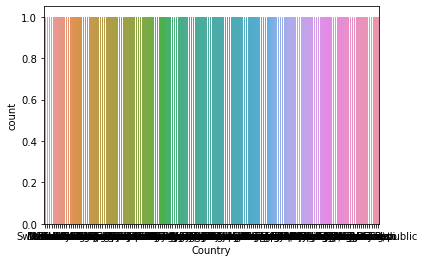

In [14]:
sns.countplot('Country',data=df)
print(df['Country'].value_counts())

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


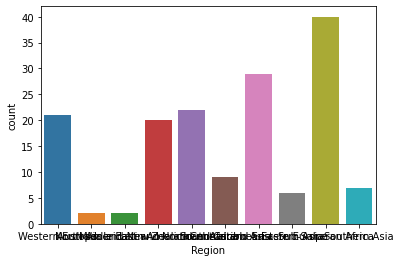

In [15]:
sns.countplot('Region',data=df)
print(df['Region'].value_counts())

Very high amount of data are present in Sub-saharan Africa Region total 40 countries are present under this region

5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64


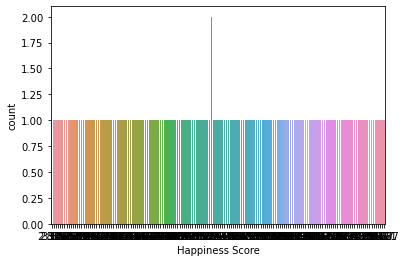

In [16]:
sns.countplot('Happiness Score',data=df)
print(df['Happiness Score'].value_counts())

Happiness score of all the country are different

0.03780    2
0.03751    2
0.04394    2
0.05051    2
0.04934    2
          ..
0.04114    1
0.04251    1
0.03843    1
0.05371    1
0.06727    1
Name: Standard Error, Length: 153, dtype: int64


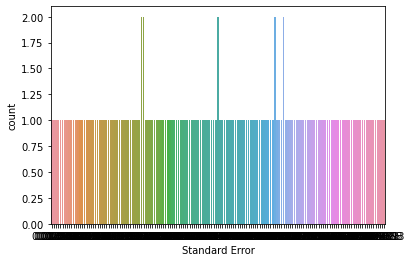

In [17]:
sns.countplot('Standard Error',data=df)
print(df['Standard Error'].value_counts())

153 unique values are present in Standard Error column___________The standard error of the happiness score.

1.39651    1
0.39753    1
1.15406    1
1.02564    1
1.12094    1
          ..
1.12254    1
1.18498    1
1.14723    1
0.59325    1
0.20868    1
Name: Economy (GDP per Capita), Length: 158, dtype: int64


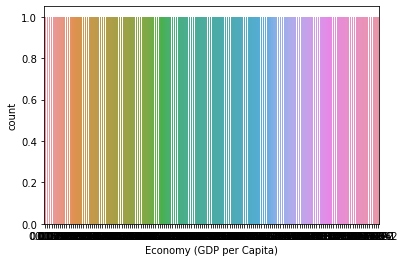

In [18]:
sns.countplot('Economy (GDP per Capita)',data=df)
print(df['Economy (GDP per Capita)'].value_counts())

All of the country have different GDP__________
 GDP contributes to the calculation of the Happiness Score.

1.34951    1
0.43106    1
0.92933    1
0.80001    1
1.20215    1
          ..
1.12241    1
1.27385    1
1.25745    1
1.14184    1
0.13995    1
Name: Family, Length: 158, dtype: int64


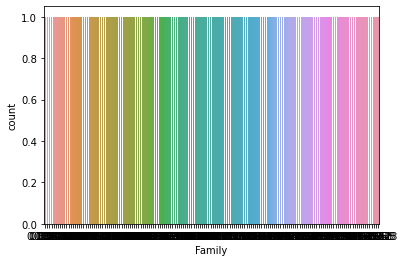

In [19]:
sns.countplot(('Family'),data=df)
print(df['Family'].value_counts())

Family contributes to the calculation of the Happiness Score in different country

0.92356    2
0.94143    1
0.60268    1
0.88213    1
0.83947    1
          ..
0.66098    1
0.64368    1
0.87337    1
0.73128    1
0.28443    1
Name: Health (Life Expectancy), Length: 157, dtype: int64


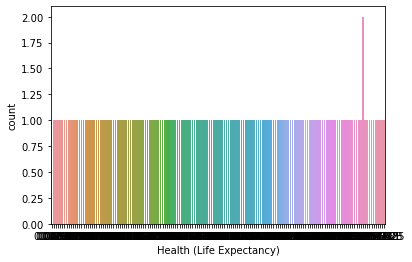

In [20]:
sns.countplot(('Health (Life Expectancy)'),data=df)
print(df['Health (Life Expectancy)'].value_counts())

0.66557    1
0.40820    1
0.07699    1
0.33916    1
0.32112    1
          ..
0.51649    1
0.60855    1
0.21342    1
0.55475    1
0.36453    1
Name: Freedom, Length: 158, dtype: int64


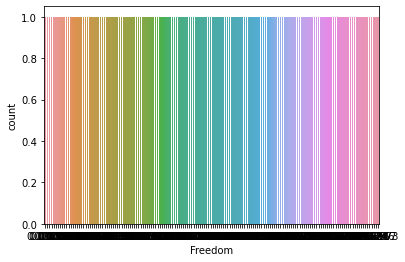

In [21]:
sns.countplot(('Freedom'),data=df)
print(df['Freedom'].value_counts())

Freedom contributes to the calculation of the Happiness Score in different country

0.32524    2
0.07625    1
0.01397    1
0.04582    1
0.02758    1
          ..
0.03787    1
0.01031    1
0.19317    1
0.05989    1
0.10731    1
Name: Trust (Government Corruption), Length: 157, dtype: int64


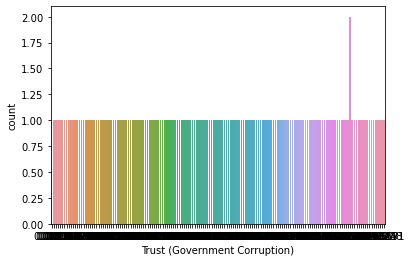

In [22]:
sns.countplot(('Trust (Government Corruption)'),data=df)
print(df['Trust (Government Corruption)'].value_counts())

0.29678    1
0.21222    1
0.00000    1
0.21854    1
0.12800    1
          ..
0.11827    1
0.25328    1
0.02641    1
0.27815    1
0.16681    1
Name: Generosity, Length: 158, dtype: int64


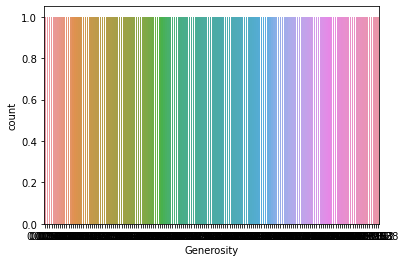

In [23]:
sns.countplot(('Generosity'),data=df)
print(df['Generosity'].value_counts())

2.51738    1
2.51767    1
1.80101    1
1.57059    1
1.24074    1
          ..
2.24729    1
1.61583    1
2.44649    1
2.32407    1
1.56726    1
Name: Dystopia Residual, Length: 158, dtype: int64


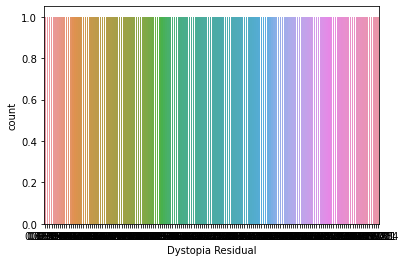

In [24]:
sns.countplot(('Dystopia Residual'),data=df)
print(df['Dystopia Residual'].value_counts())

# Bivariate Analysis

<AxesSubplot:>

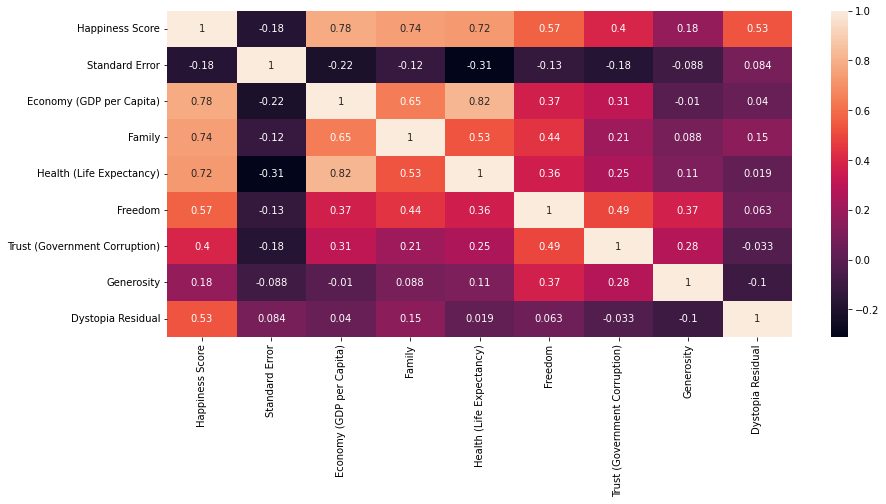

In [25]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(),annot=True)

1. Health (Life Expectancy) are highly positivly corelated with target variable Happiness score
2. Freedom are positively corelated with target variable Happiness score
3. Trust government corrupction are positivly corelated with target variable Happiness Score
4. Generosity are less positivly corelated with target variable Happiness Score
5. dystopia residual are positively corelaeed with target variable Happiness Score


Text(0.5, 1.0, 'Scatter Plot Example for Bivariate Analysis')

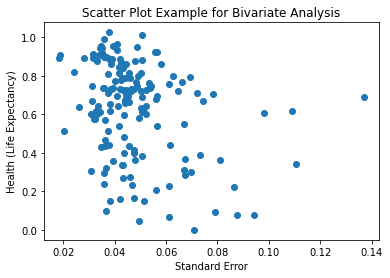

In [26]:
x = df['Standard Error']
y = df['Health (Life Expectancy)']
plt.scatter(x, y)
plt.xlabel('Standard Error')
plt.ylabel('Health (Life Expectancy)')
plt.title('Scatter Plot Example for Bivariate Analysis')

Standard error and Health life expectancy are negatively corelated with each other

<AxesSubplot:xlabel='Happiness Score', ylabel='Family'>

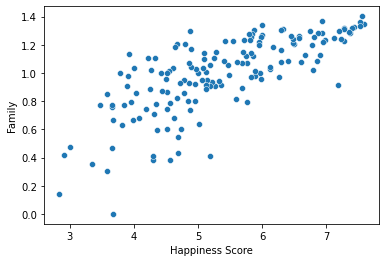

In [27]:
sns.scatterplot(x='Happiness Score',y='Family',data=df)

Happiness score and Family are very highly positivly corelated with each other

<AxesSubplot:xlabel='Standard Error', ylabel='Family'>

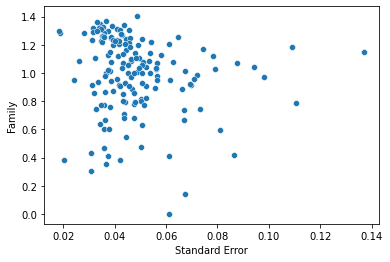

In [28]:
sns.scatterplot(x='Standard Error',y='Family',data=df)

Family and Standard Error are negatively corelated with each other

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Health (Life Expectancy)'>

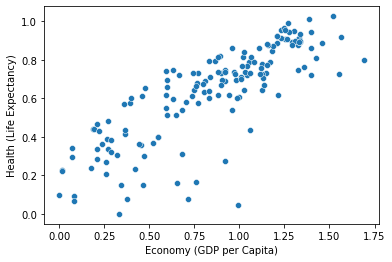

In [29]:
sns.scatterplot(x='Economy (GDP per Capita)',y='Health (Life Expectancy)',data=df)

Economy gdp and health life expectancy are highly positively corelated with each other

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Standard Error'>

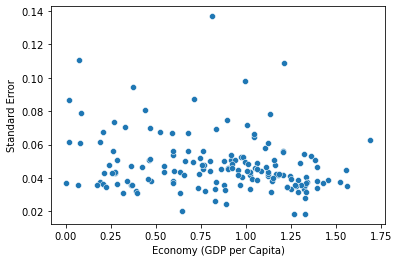

In [30]:
sns.scatterplot(x='Economy (GDP per Capita)',y='Standard Error',data=df)

Economy gdp and Standard Error are negatively corelated with each other

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Freedom'>

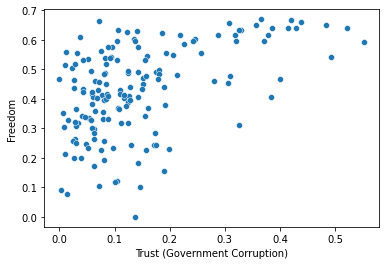

In [31]:
sns.scatterplot(x='Trust (Government Corruption)',y='Freedom',data=df)

Trust (Government Corruption) and Family are positively corelated with each other

<AxesSubplot:xlabel='Standard Error', ylabel='Happiness Score'>

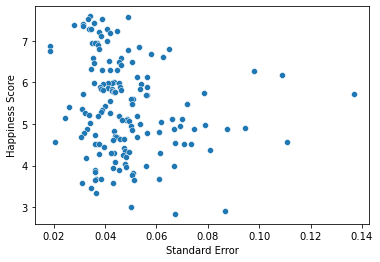

In [32]:
sns.scatterplot(x='Standard Error',y='Happiness Score',data=df)

Happiness Score and Standard Error are positively corelated with each other

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Generosity'>

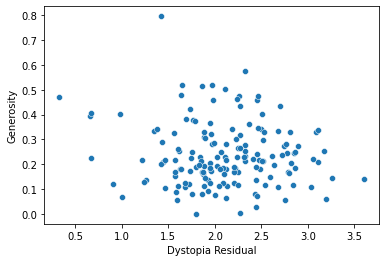

In [33]:
sns.scatterplot(x='Dystopia Residual',y='Generosity',data=df)

Dystopia Residual and Geneyosity are negatively corelated with each other

<AxesSubplot:xlabel='Happiness Score', ylabel='Standard Error'>

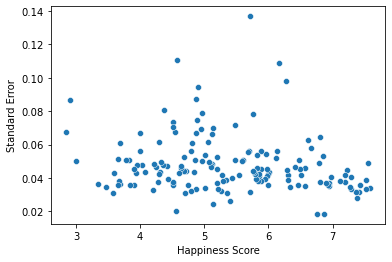

In [34]:
sns.scatterplot(x='Happiness Score',y='Standard Error',data=df)

Standard Error are negatively corelated with target variable (Happiness score)

<AxesSubplot:xlabel='Happiness Score', ylabel='Economy (GDP per Capita)'>

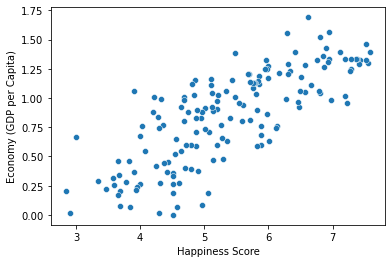

In [35]:
sns.scatterplot(x='Happiness Score',y='Economy (GDP per Capita)',data=df)

Economy (GDP per Capita) are very high positively corelated with target variable Happiness score

<AxesSubplot:xlabel='Happiness Score', ylabel='Family'>

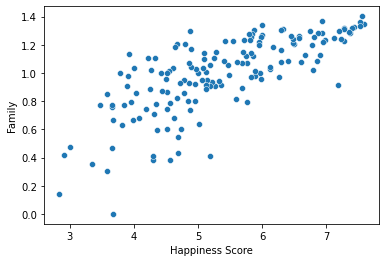

In [36]:
sns.scatterplot(x='Happiness Score',y='Family',data=df)

Family are very high positively corelated with target variable Happiness score

# Multivariant Analysis

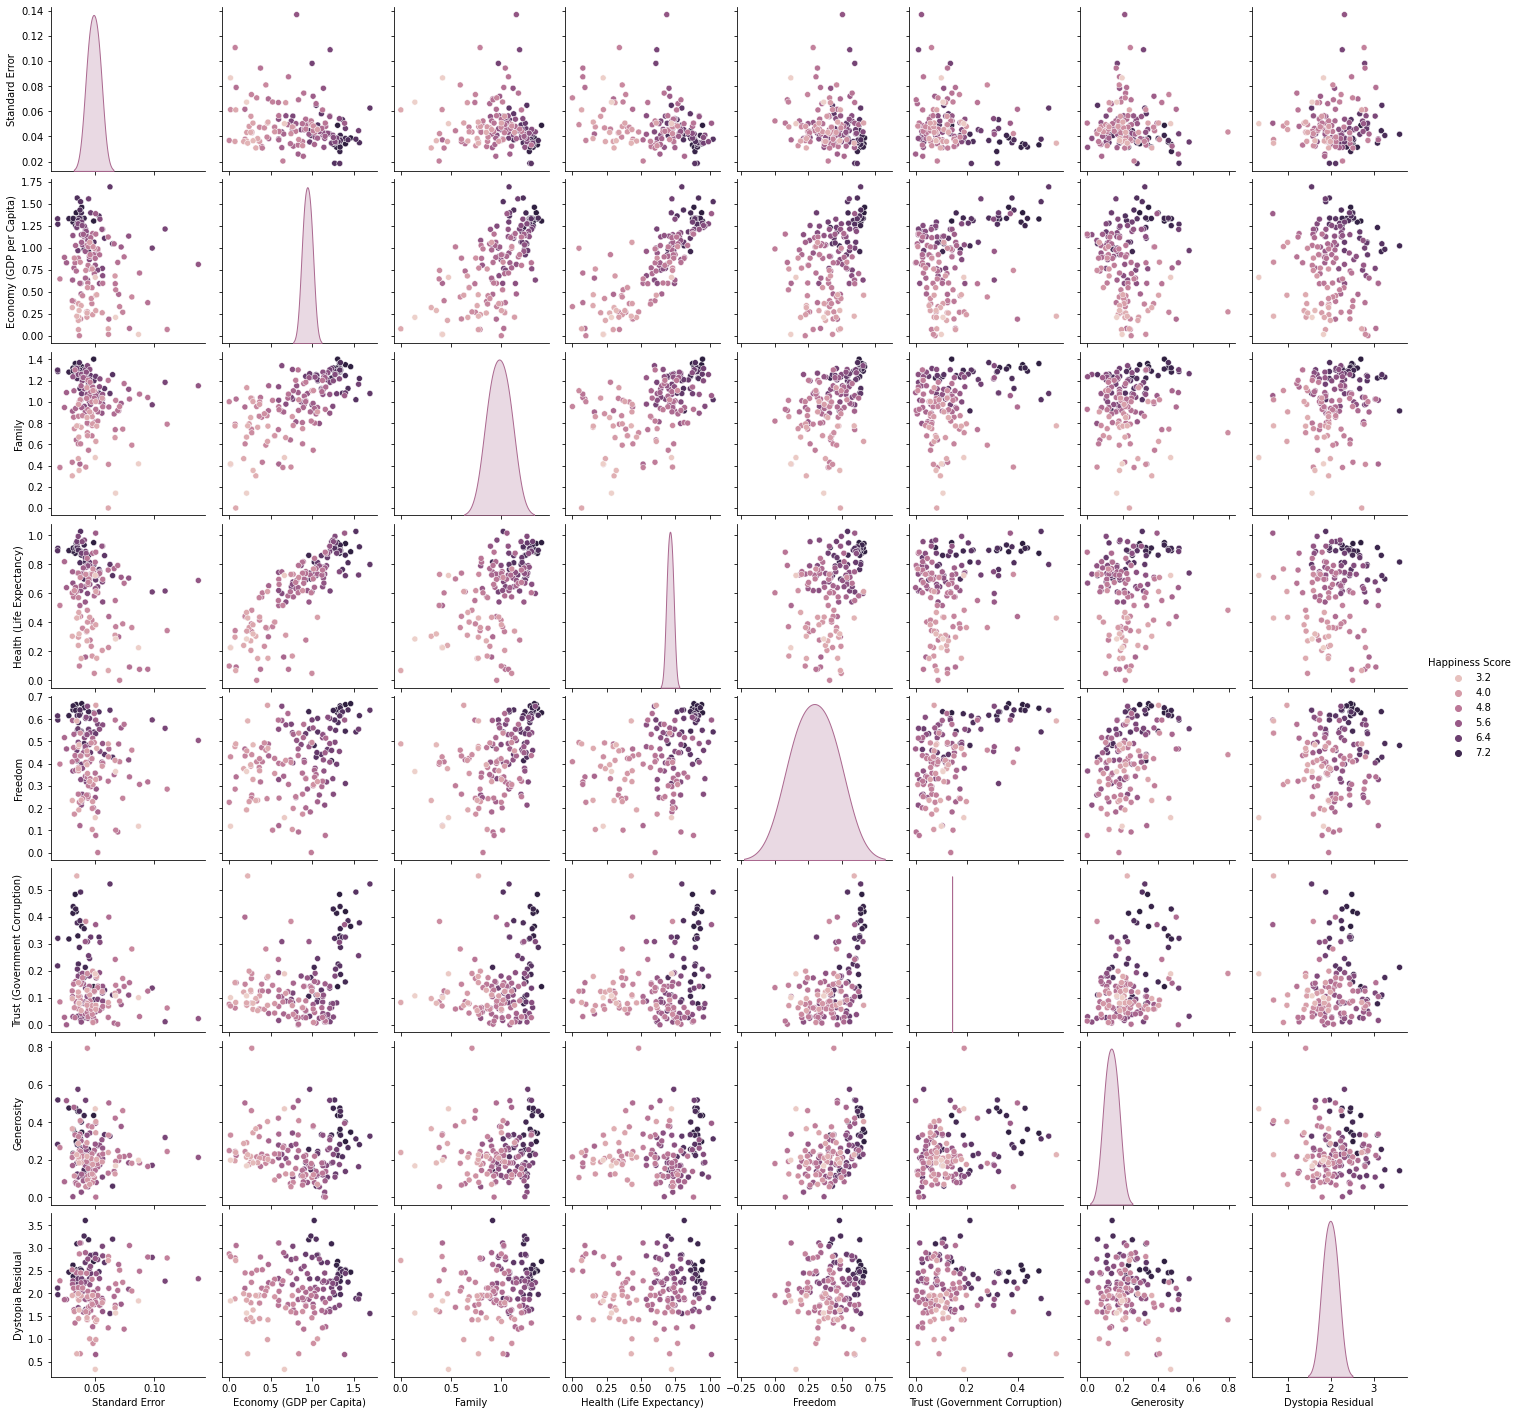

In [37]:
sns.pairplot(df,hue='Happiness Score')
plt.show()

The pairplot gives the pairwise relationship between the features on the  basis of target "Happiness score" and we can notice the distribution plot

# Checking the skewness and remopve it

In [38]:
df.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [39]:
from scipy.stats import boxcox,skew

In [40]:
df['Standard Error']=boxcox(df['Standard Error'],0)

In [41]:
df['Family']=np.cbrt(df['Family'])

In [42]:
df['Health (Life Expectancy) ']=np.cbrt(df['Health (Life Expectancy)'])

In [43]:
df['Trust (Government Corruption)']=np.cbrt(df['Trust (Government Corruption)'])

In [44]:
df['Generosity']=np.cbrt(df['Generosity'])

In [45]:
df.skew()

Happiness Score                  0.097769
Standard Error                   0.484623
Economy (GDP per Capita)        -0.317575
Family                          -3.573056
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    0.011932
Generosity                      -0.961079
Dystopia Residual               -0.238911
Health (Life Expectancy)        -1.981292
dtype: float64

# Encoding The Country,Region Column Through LabelEncoder

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
LE=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=LE.fit_transform(df[i].values)
df    

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Health (Life Expectancy)
0,135,9,7.587,-3.378165,1.39651,1.105076,0.94143,0.66557,0.748756,0.667029,2.51738,0.980083
1,58,9,7.561,-3.019206,1.30232,1.119283,0.94784,0.62877,0.521036,0.758453,2.70201,0.982302
2,37,9,7.527,-3.402799,1.32548,1.108089,0.87464,0.64938,0.784910,0.698903,2.49204,0.956334
3,105,9,7.522,-3.249335,1.45900,1.099986,0.88521,0.66973,0.714677,0.702704,2.46531,0.960171
4,24,5,7.427,-3.337378,1.32629,1.097684,0.90563,0.63297,0.690742,0.770886,2.45176,0.967498
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,3.465,-3.362746,0.22208,0.918031,0.42864,0.59201,0.820269,0.609371,0.67042,0.753988
154,13,8,3.340,-3.308801,0.28665,0.707311,0.31910,0.48450,0.431066,0.567327,1.63328,0.683349
155,136,4,3.006,-2.992737,0.66320,0.780185,0.72193,0.15684,0.573940,0.778484,0.32858,0.897081
156,21,8,2.905,-2.446686,0.01530,0.746424,0.22396,0.11850,0.465116,0.582130,1.83302,0.607282


Now we can encode the data from onject to int value with the help of LabelEncoder

# Removing outlyers

In [48]:
from scipy.stats import zscore

In [49]:
z=np.abs(zscore(df))
z

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Health (Life Expectancy)
0,1.238770,1.300256,1.937360,0.915376,1.369621,0.952066,1.263408,1.577438,1.826993,0.576890,0.758258,0.959021
1,0.449465,1.300256,1.914581,0.229364,1.135226,1.062927,1.289434,1.332456,0.260958,1.325808,1.092857,0.973528
2,0.909893,1.300256,1.884792,0.993935,1.192861,0.975580,0.992229,1.469659,2.075620,0.837993,0.712335,0.803789
3,0.581016,1.300256,1.880411,0.504531,1.525130,0.912350,1.035145,1.605131,1.592625,0.869128,0.663893,0.828870
4,1.194920,0.040302,1.797179,0.785305,1.194876,0.894384,1.118054,1.360416,1.428028,1.427657,0.639337,0.876764
...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.866043,0.965117,1.674055,0.866206,1.552987,0.507509,0.818610,1.087740,2.318782,0.104570,2.588925,0.518863
154,1.436096,0.965117,1.783571,0.694170,1.392303,2.151835,1.263362,0.372033,0.357762,0.239847,0.843967,0.980600
155,1.260695,0.375441,2.076199,0.313775,0.455245,1.583173,0.372199,1.809238,0.624780,1.489900,3.208430,0.416476
156,1.260695,0.965117,2.164688,2.055159,2.067566,1.846619,1.649648,2.064472,0.123602,0.118581,0.481985,1.477816


In [50]:
threshold=3
print(np.where(z>3))

(array([ 63,  64,  73, 101, 122, 127, 147, 155, 157], dtype=int64), array([ 9,  3,  8,  9, 11, 11,  5, 10,  5], dtype=int64))


In [51]:
df1=df[(z<3).all(axis=1)]

In [52]:
print(df.shape)
print(df1.shape)

(158, 12)
(149, 12)


In [53]:
loss_percent=(158-149)/158*100
print(loss_percent)

5.69620253164557


after removing outlyers we can loss only 7.3% data and this loss is acceptable

# Corelation between Target Variable and independent variable

In [54]:
cor=df1.corr()
cor

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Health (Life Expectancy)
Country,1.000000,0.022377,0.110221,0.018713,0.053897,0.215271,0.032064,0.112885,0.049187,0.129533,0.004449,0.038343
Region,0.022377,1.000000,-0.150666,-0.088742,-0.247806,-0.151661,-0.340804,0.110779,0.242805,0.345922,-0.057379,-0.384125
Happiness Score,0.110221,-0.150666,1.000000,-0.194811,0.787913,0.697893,0.743358,0.579208,0.364666,0.198403,0.526342,0.681730
Standard Error,0.018713,-0.088742,-0.194811,1.000000,-0.201879,-0.056723,-0.316999,-0.191734,-0.186768,-0.080742,0.051733,-0.318742
Economy (GDP per Capita),0.053897,-0.247806,0.787913,-0.201879,1.000000,0.612263,0.834523,0.401015,0.231253,-0.016291,0.047991,0.781435
Family,0.215271,-0.151661,0.697893,-0.056723,0.612263,1.000000,0.516068,0.438706,0.144762,0.096596,0.118458,0.456250
Health (Life Expectancy),0.032064,-0.340804,0.743358,-0.316999,0.834523,0.516068,1.000000,0.426815,0.174307,0.074314,0.034682,0.981024
Freedom,0.112885,0.110779,0.579208,-0.191734,0.401015,0.438706,0.426815,1.000000,0.492838,0.404288,0.017495,0.403530
Trust (Government Corruption),0.049187,0.242805,0.364666,-0.186768,0.231253,0.144762,0.174307,0.492838,1.000000,0.270390,0.019616,0.153784
Generosity,0.129533,0.345922,0.198403,-0.080742,-0.016291,0.096596,0.074314,0.404288,0.270390,1.000000,-0.059832,0.058105


we can observe the relation between target and independent variable this method contains both positive and negative corelation

In [55]:
cor['Happiness Score'].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.787913
Health (Life Expectancy)         0.743358
Family                           0.697893
Health (Life Expectancy)         0.681730
Freedom                          0.579208
Dystopia Residual                0.526342
Trust (Government Corruption)    0.364666
Generosity                       0.198403
Country                          0.110221
Region                          -0.150666
Standard Error                  -0.194811
Name: Happiness Score, dtype: float64

we can observe the positive and negative corelation with target

# Seperating Target and independent variable

In [56]:
y=df1.iloc[:,2:3]
x=df1.drop('Happiness Score',axis=1)

In [57]:
x

,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Health (Life Expectancy)
0,135,9,-3.378165,1.39651,1.105076,0.94143,0.66557,0.748756,0.667029,2.51738,0.980083
1,58,9,-3.019206,1.30232,1.119283,0.94784,0.62877,0.521036,0.758453,2.70201,0.982302
2,37,9,-3.402799,1.32548,1.108089,0.87464,0.64938,0.784910,0.698903,2.49204,0.956334
3,105,9,-3.249335,1.45900,1.099986,0.88521,0.66973,0.714677,0.702704,2.46531,0.960171
4,24,5,-3.337378,1.32629,1.097684,0.90563,0.63297,0.690742,0.770886,2.45176,0.967498
...,...,...,...,...,...,...,...,...,...,...,...
151,20,8,-3.140989,0.25812,0.947966,0.27125,0.39493,0.504388,0.601358,1.46494,0.647326
152,0,7,-3.478943,0.31982,0.671546,0.30335,0.23414,0.459770,0.714722,1.95210,0.671916
153,118,8,-3.362746,0.22208,0.918031,0.42864,0.59201,0.820269,0.609371,0.67042,0.753988
154,13,8,-3.308801,0.28665,0.707311,0.31910,0.48450,0.431066,0.567327,1.63328,0.683349


In [58]:
y

,Happiness Score
0,7.587
1,7.561
2,7.527
3,7.522
4,7.427
...,...
151,3.587
152,3.575
153,3.465
154,3.340


# feature scaling using standard scaler

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
st = StandardScaler()
x = st.fit_transform(x)
x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,10
0,1.242602,1.316415,-0.922041,1.347697,1.186407,1.269613,1.558370,1.833502,0.611219,0.749216,1.044233
1,-0.444942,1.316415,0.275540,1.113017,1.336120,1.296747,1.312663,0.217708,1.472524,1.091018,1.061276
2,-0.905181,1.316415,-1.004226,1.170721,1.218163,0.986891,1.450272,2.090029,0.911504,0.702305,0.861865
3,0.585117,1.316415,-0.492232,1.503395,1.132774,1.031634,1.586146,1.591687,0.947311,0.652820,0.891331
4,-1.190091,-0.020184,-0.785965,1.172740,1.108511,1.118072,1.340706,1.421860,1.589657,0.627735,0.947596
...,...,...,...,...,...,...,...,...,...,...,...
144,-1.277756,0.982265,-0.130762,-1.488670,-0.469223,-1.567257,-0.248645,0.099583,-0.007475,-1.199142,-1.511073
145,-1.716079,0.648116,-1.258262,-1.334941,-3.382154,-1.431378,-1.322212,-0.217006,1.060538,-0.297274,-1.322247
146,0.870027,0.982265,-0.870601,-1.578466,-0.784677,-0.901026,1.067223,2.340917,0.068019,-2.670019,-0.691998
147,-1.431169,0.982265,-0.690624,-1.417586,-3.005260,-1.364708,0.349398,-0.420672,-0.328082,-0.887498,-1.234451


Now our data has been Standard and refined

# Checking (VIF)

In [61]:
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
vif= pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i)
                   for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.088985,0
1,1.637489,1
2,1.224084,2
3,4.595550,3
4,1.974092,4
5,44.491098,5
6,1.955437,6
7,1.456241,7
8,1.451341,8
9,1.062924,9


Problem of multicoliniarity have been exist in two columns to remove the problem of multicoliniarity we can drop the high vif value column

In [63]:
x = x.drop([5],axis=1)

In [64]:
vif= pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i)
                   for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.071837,0
1,1.604686,1
2,1.218305,2
3,3.577106,3
4,1.907670,4
5,1.955211,6
6,1.451332,7
7,1.431586,8
8,1.028333,9
9,3.578700,10


Now our vif values are in acceptable range and problem of multicoliniarity have been removed 

# Modeling Finding The Best Random State

In [65]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import cross_val_score

In [66]:
maxaccu=0
maxRS=0
for i in range(1,300):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30,random_state = i)
    Lr = LinearRegression()
    Lr.fit(x_train, y_train)
    pred= Lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc > maxaccu:
        maxaccu = acc
        masRS = i
print("maximum r2 score is",maxaccu,"on random state is",maxRS)

maximum r2 score is 0.9976730465593372 on random state is 0


In [67]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30,random_state = maxRS)

In [68]:
Lr=LinearRegression()
dtc= DecisionTreeRegressor()
knn=KNeighborsRegressor()
RFC=RandomForestRegressor()
lasso=Lasso()
rd=Ridge()
ETR=ExtraTreesRegressor()
svr= SVR()
model=[Lr,dtc,knn,RFC,lasso,rd,ETR,svr]

for M in model:
    M.fit(x_train,y_train)
    pred=M.predict(x_test)
    pred_train=M.predict(x_train)
    print('r2 score of ',M,'is',)
    print("R2_score:",r2_score(y_test,pred))
    print("R2_score on training data:",r2_score(y_train,pred_train)*100)
    print("MAE:",mean_absolute_error(y_test,pred))
    print("MSE",mean_squared_error(y_test,pred))
    print("Root MSE",np.sqrt(mean_squared_error(y_test,pred)))
    print("\n")
    print(M)
    score=cross_val_score(M,x,y,cv=5)
    print(score)
    print(score.mean())
    print('difference between and cross validation score is',r2_score(y_test,pred) - score.mean())
    print("\n")

r2 score of  LinearRegression() is
R2_score: 0.995412911366888
R2_score on training data: 99.65020441537034
MAE: 0.06278818333229294
MSE 0.005629798130372449
Root MSE 0.07503198071737444


LinearRegression()
[0.85985405 0.88689559 0.92536131 0.58331303 0.89739482]
0.8305637608587993
difference between and cross validation score is 0.16484915050808868


r2 score of  DecisionTreeRegressor() is
R2_score: 0.5205317583160898
R2_score on training data: 100.0
MAE: 0.5367111111111111
MSE 0.5884580888888888
Root MSE 0.7671102195179574


DecisionTreeRegressor()
[-10.28062186  -9.25764864  -5.59855907 -10.86814581  -6.64644915]
-8.530284906365837
difference between and cross validation score is 9.050816664681927


r2 score of  KNeighborsRegressor() is
R2_score: 0.8920921512537194
R2_score on training data: 90.72106310799171
MAE: 0.28856
MSE 0.1324368142222222
Root MSE 0.36391869177361885


KNeighborsRegressor()
[-11.38211713  -2.56848496  -3.20266864  -9.75658464  -5.91377492]
-6.564726056604246


with all this machine learning algorithums LINEAR REGRESSION as our best fitting and best performingmodel this gives 99.54% r2_score and .16% cross validation score 

# Hyper Parametyer Tuning

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
parameters = {'normalize': [True, False],
              'copy_X': [True, False],
              'n_jobs': [0.001,0.01, 0.1, 1],
             'positive':[True, False]}



In [71]:
GCV=GridSearchCV(LinearRegression(),parameters)

In [72]:
GCV.fit(x_train,y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'n_jobs': [0.001, 0.01, 0.1, 1],
                         'normalize': [True, False],
                         'positive': [True, False]})

In [73]:
GCV.best_params_

{'copy_X': True, 'n_jobs': 1, 'normalize': True, 'positive': True}

In [74]:
final= LinearRegression(copy_X=True, n_jobs= 1, normalize= True, positive= True)
final.fit(x_train, y_train)
pred=final.predict(x_test)
acc= r2_score(y_test,pred)
print("R2_score:",r2_score(y_test,pred))
print("R2_score on training data:",r2_score(y_train,pred_train)*100)
print("MAE:",mean_absolute_error(y_test,pred))
print("MSE",mean_squared_error(y_test,pred))
print("Root MSE",np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 0.9956067900227442
R2_score on training data: 98.78109042727873
MAE: 0.061068828685860964
MSE 0.0053918481403985846
Root MSE 0.07342920495551197


After hyper parameter tuning my model get more accurated the accuracy is increase 99.54% to 99.56% 

# Saving the model using .pkl

Predicting the save model

In [76]:
import pickle
filename= 'World Happiness Score Analysis'
pickle.dump(final, open(filename, 'wb'))

In [77]:
loaded_model =pickle.load(open('World Happiness Score Analysis','rb'))
result=loaded_model.score(x_test, y_test)
print(result*100)

99.56067900227443


# prediction=loaded_model.predict(x_test)
prediction

In [84]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

# In That Dataset My Accuracy is 99.56%